In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
features = pd.read_excel('优化后数据集合.xlsx')
label1 = np.array(features['失效反向数'])  # 将每个值除以2
features = features.drop(['失效反向数'], axis=1)
label1 = np.log(label1)

# 定义MAPE函数
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建SVR模型并设置参数 
model_svr = SVR(kernel='rbf', C=105, epsilon=0.1)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_svr = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_svr.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_svr.predict(data_x4[test_index])
    r2_svr.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_svr)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_svr = cross_val_predict(model_svr, data_x4, data_y4, cv=crossvalidation)

# 计算MAPE
mape = mape_function(y_cv2_svr, data_y4)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


10折交叉验证平均R2值: 0.86
10折交叉验证平均MAPE值: 7.59


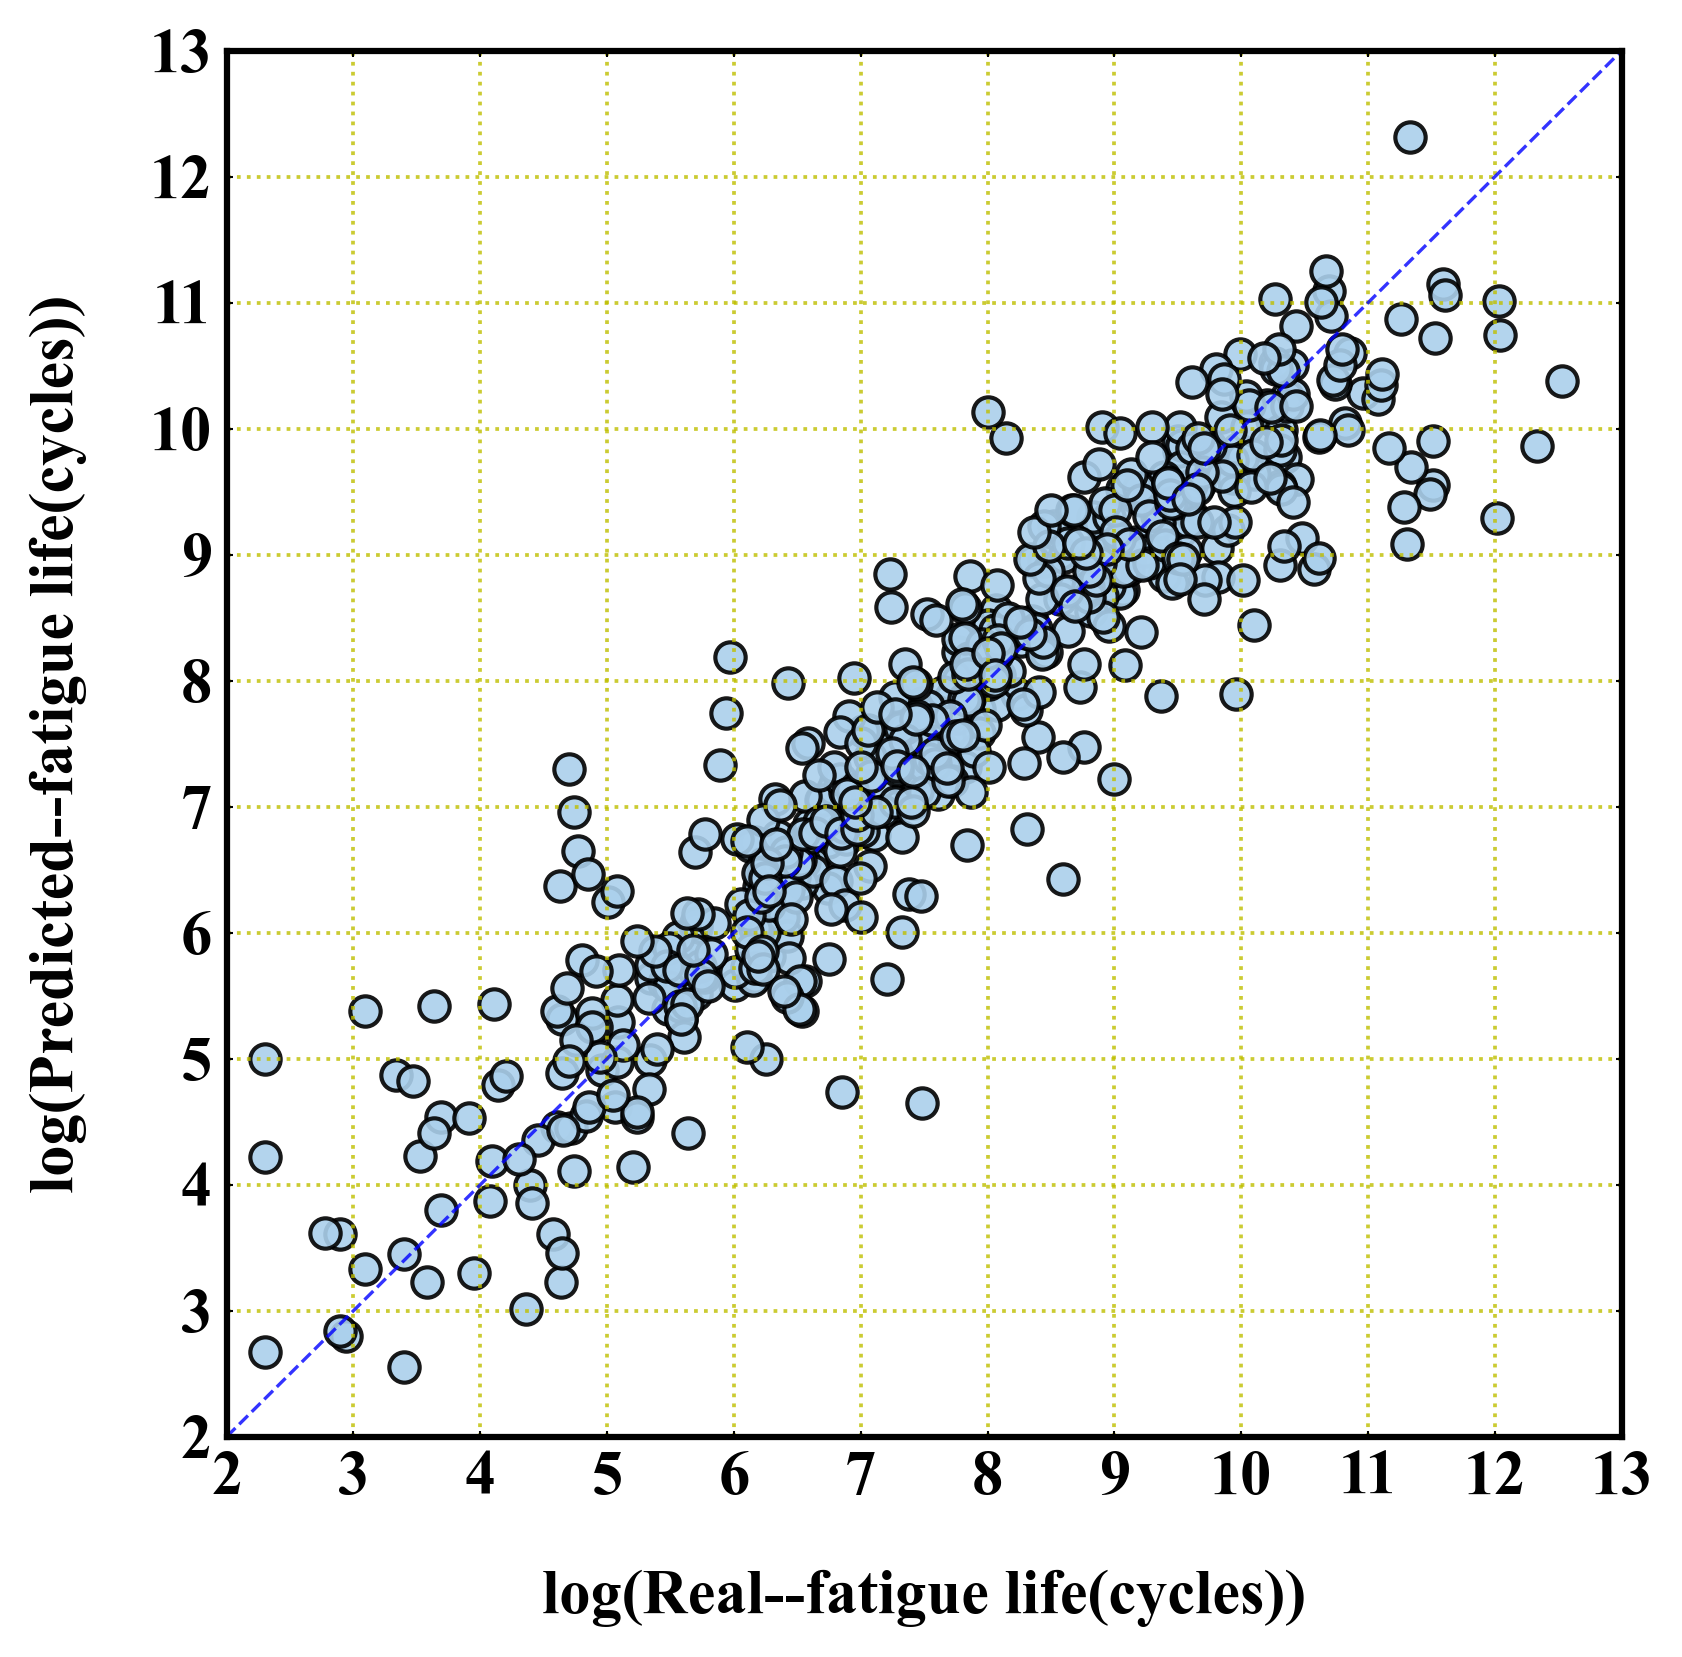

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 10})

# Customize plot borders
ax = plt.axes()
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color
# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(2, 13.1, 1))
plt.xticks(new_ticks, fontsize=15,weight='bold',fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=15,weight='bold',fontname='Times New Roman')
# 绘制散点图
plt.scatter(data_y4, y_cv2_svr, alpha=0.9, s=53, linewidths=1.0, c='#ABD0EC',
            edgecolor='#000000', marker='o')
# 添加图例
plt.plot([2, 13.1], [2, 13.1], 'b--', linewidth='0.8', alpha=0.8)
plt.ylim(2,13)
plt.xlim(2,13)
# Display the plot
plt.xlabel('log(Real--fatigue life(cycles))', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.ylabel('log(Predicted--fatigue life(cycles))', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21452 (\N{CJK UNIFIED IDEOGRAPH-53CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23792 (\N{CJK UNIFIED IDEOGRAPH-5CF0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK

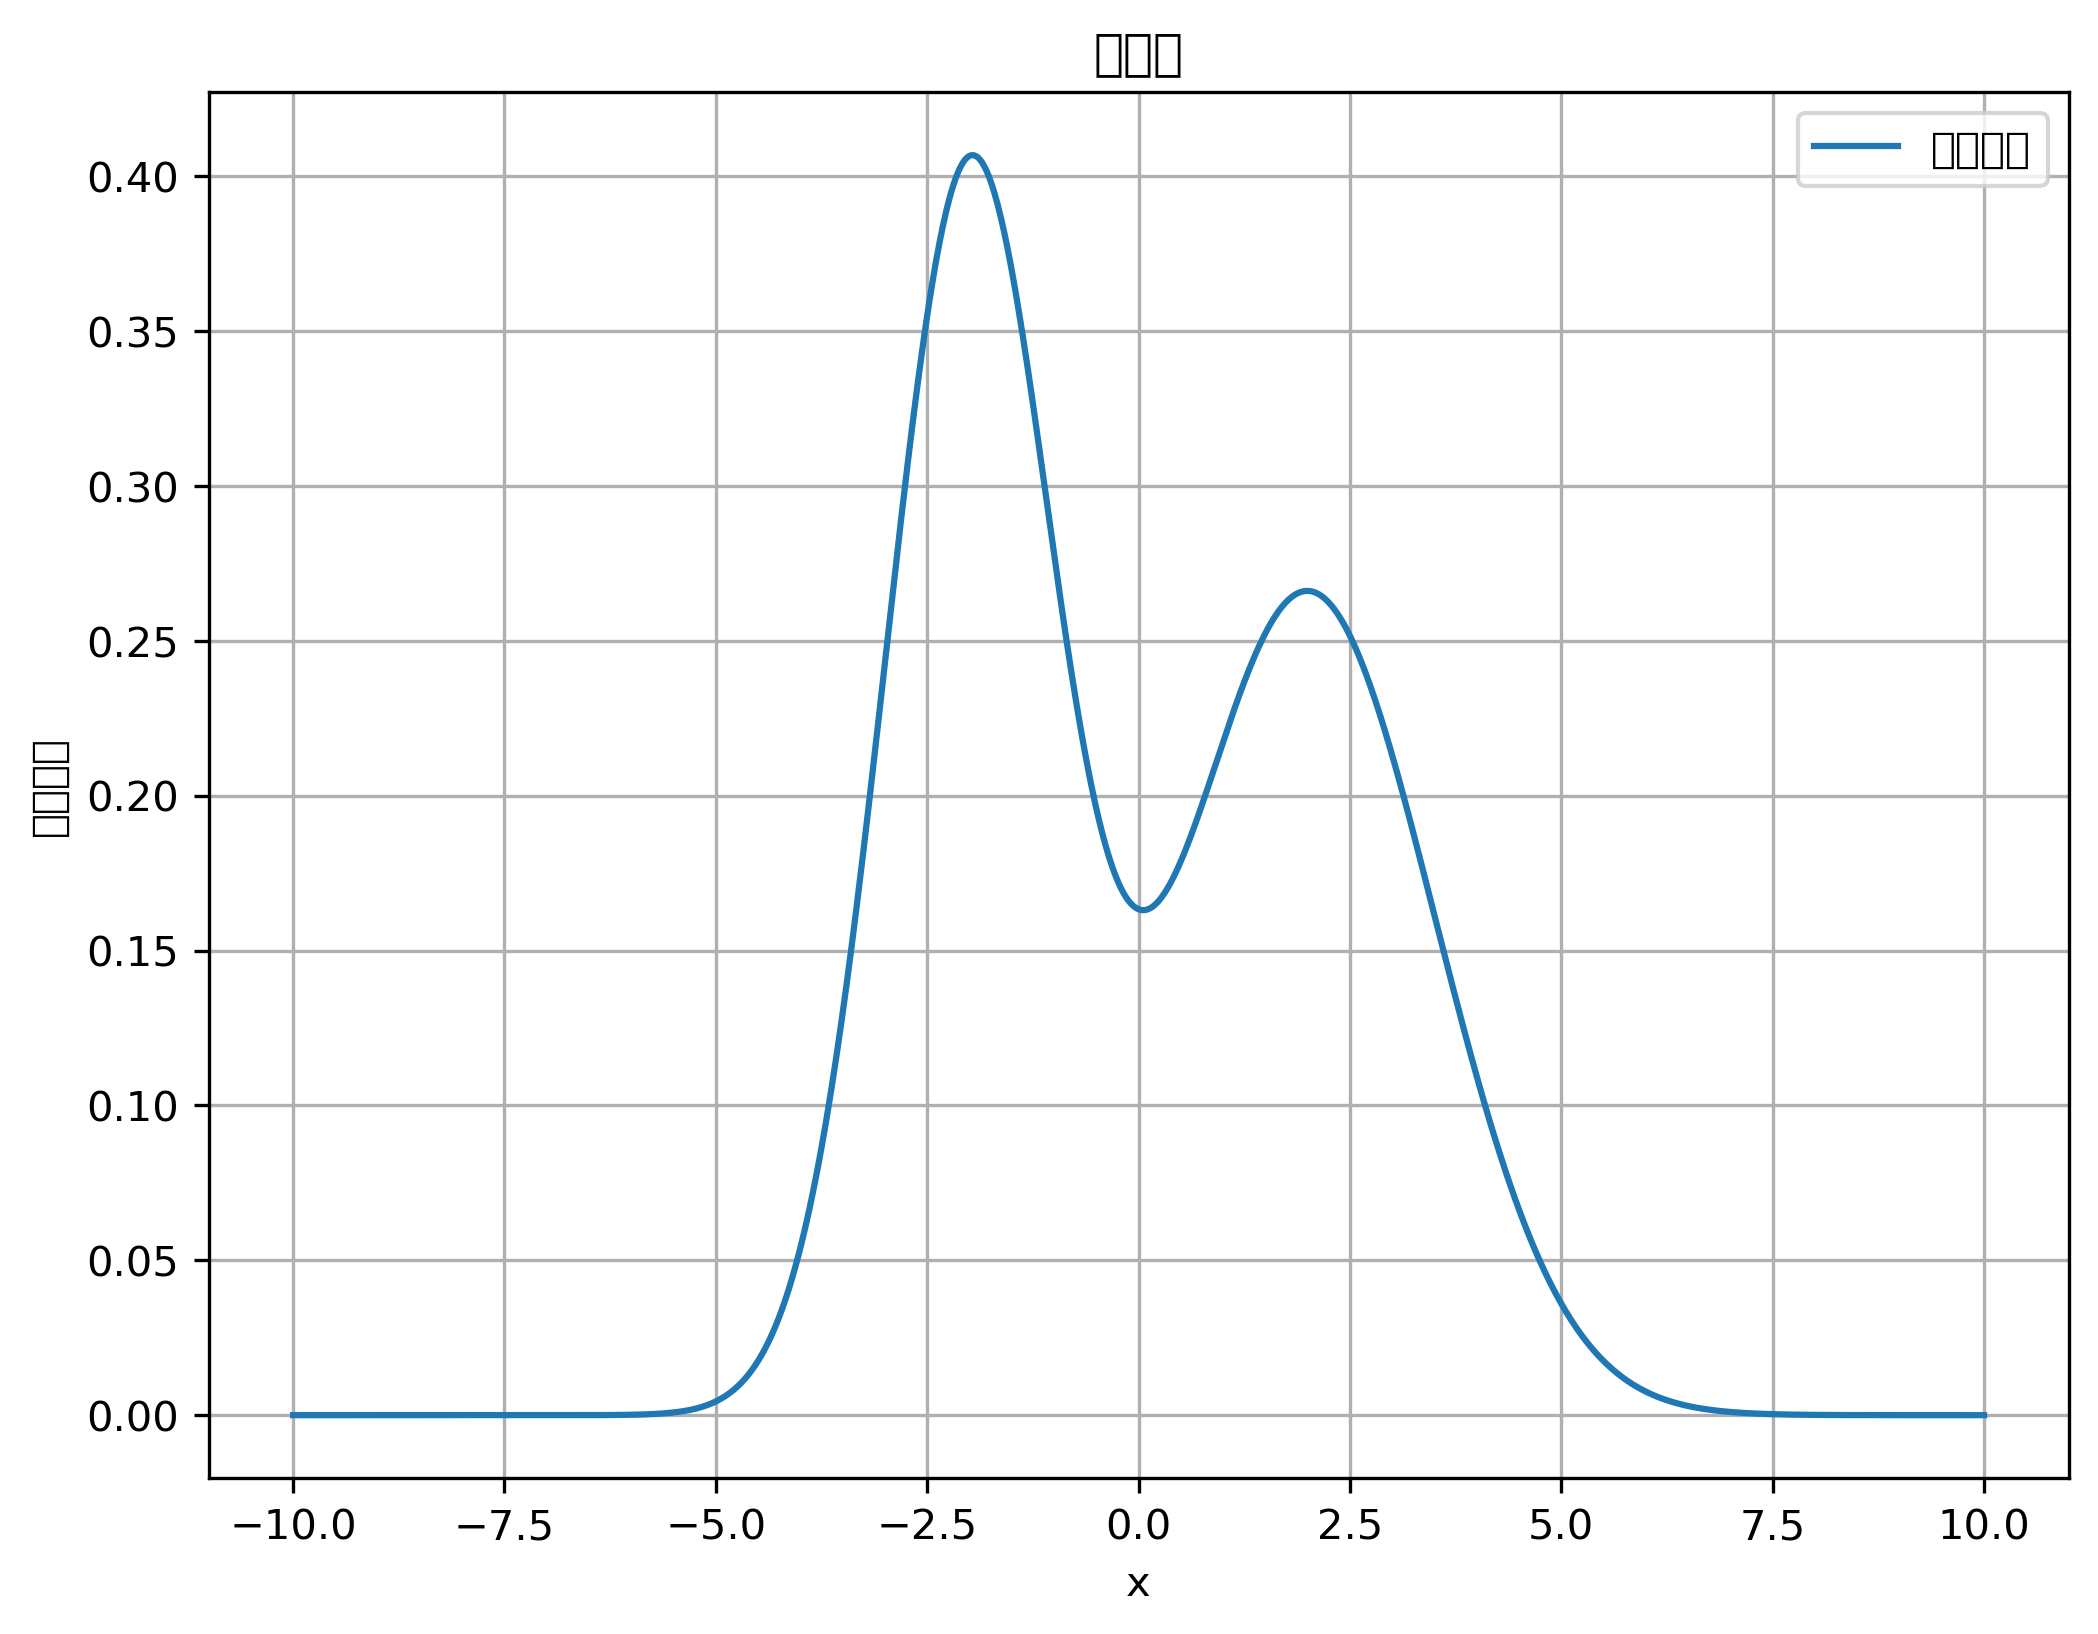

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 创建数据
x = np.linspace(-10, 10, 1000)
mu1, mu2, sigma1, sigma2 = -2, 2, 1, 1.5  # 两个峰的均值和标准差
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)

# 叠加双峰
y = y1 + y2

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='双峰分布')
plt.title('双峰图')
plt.xlabel('x')
plt.ylabel('概率密度')
plt.legend()
plt.grid(True)
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


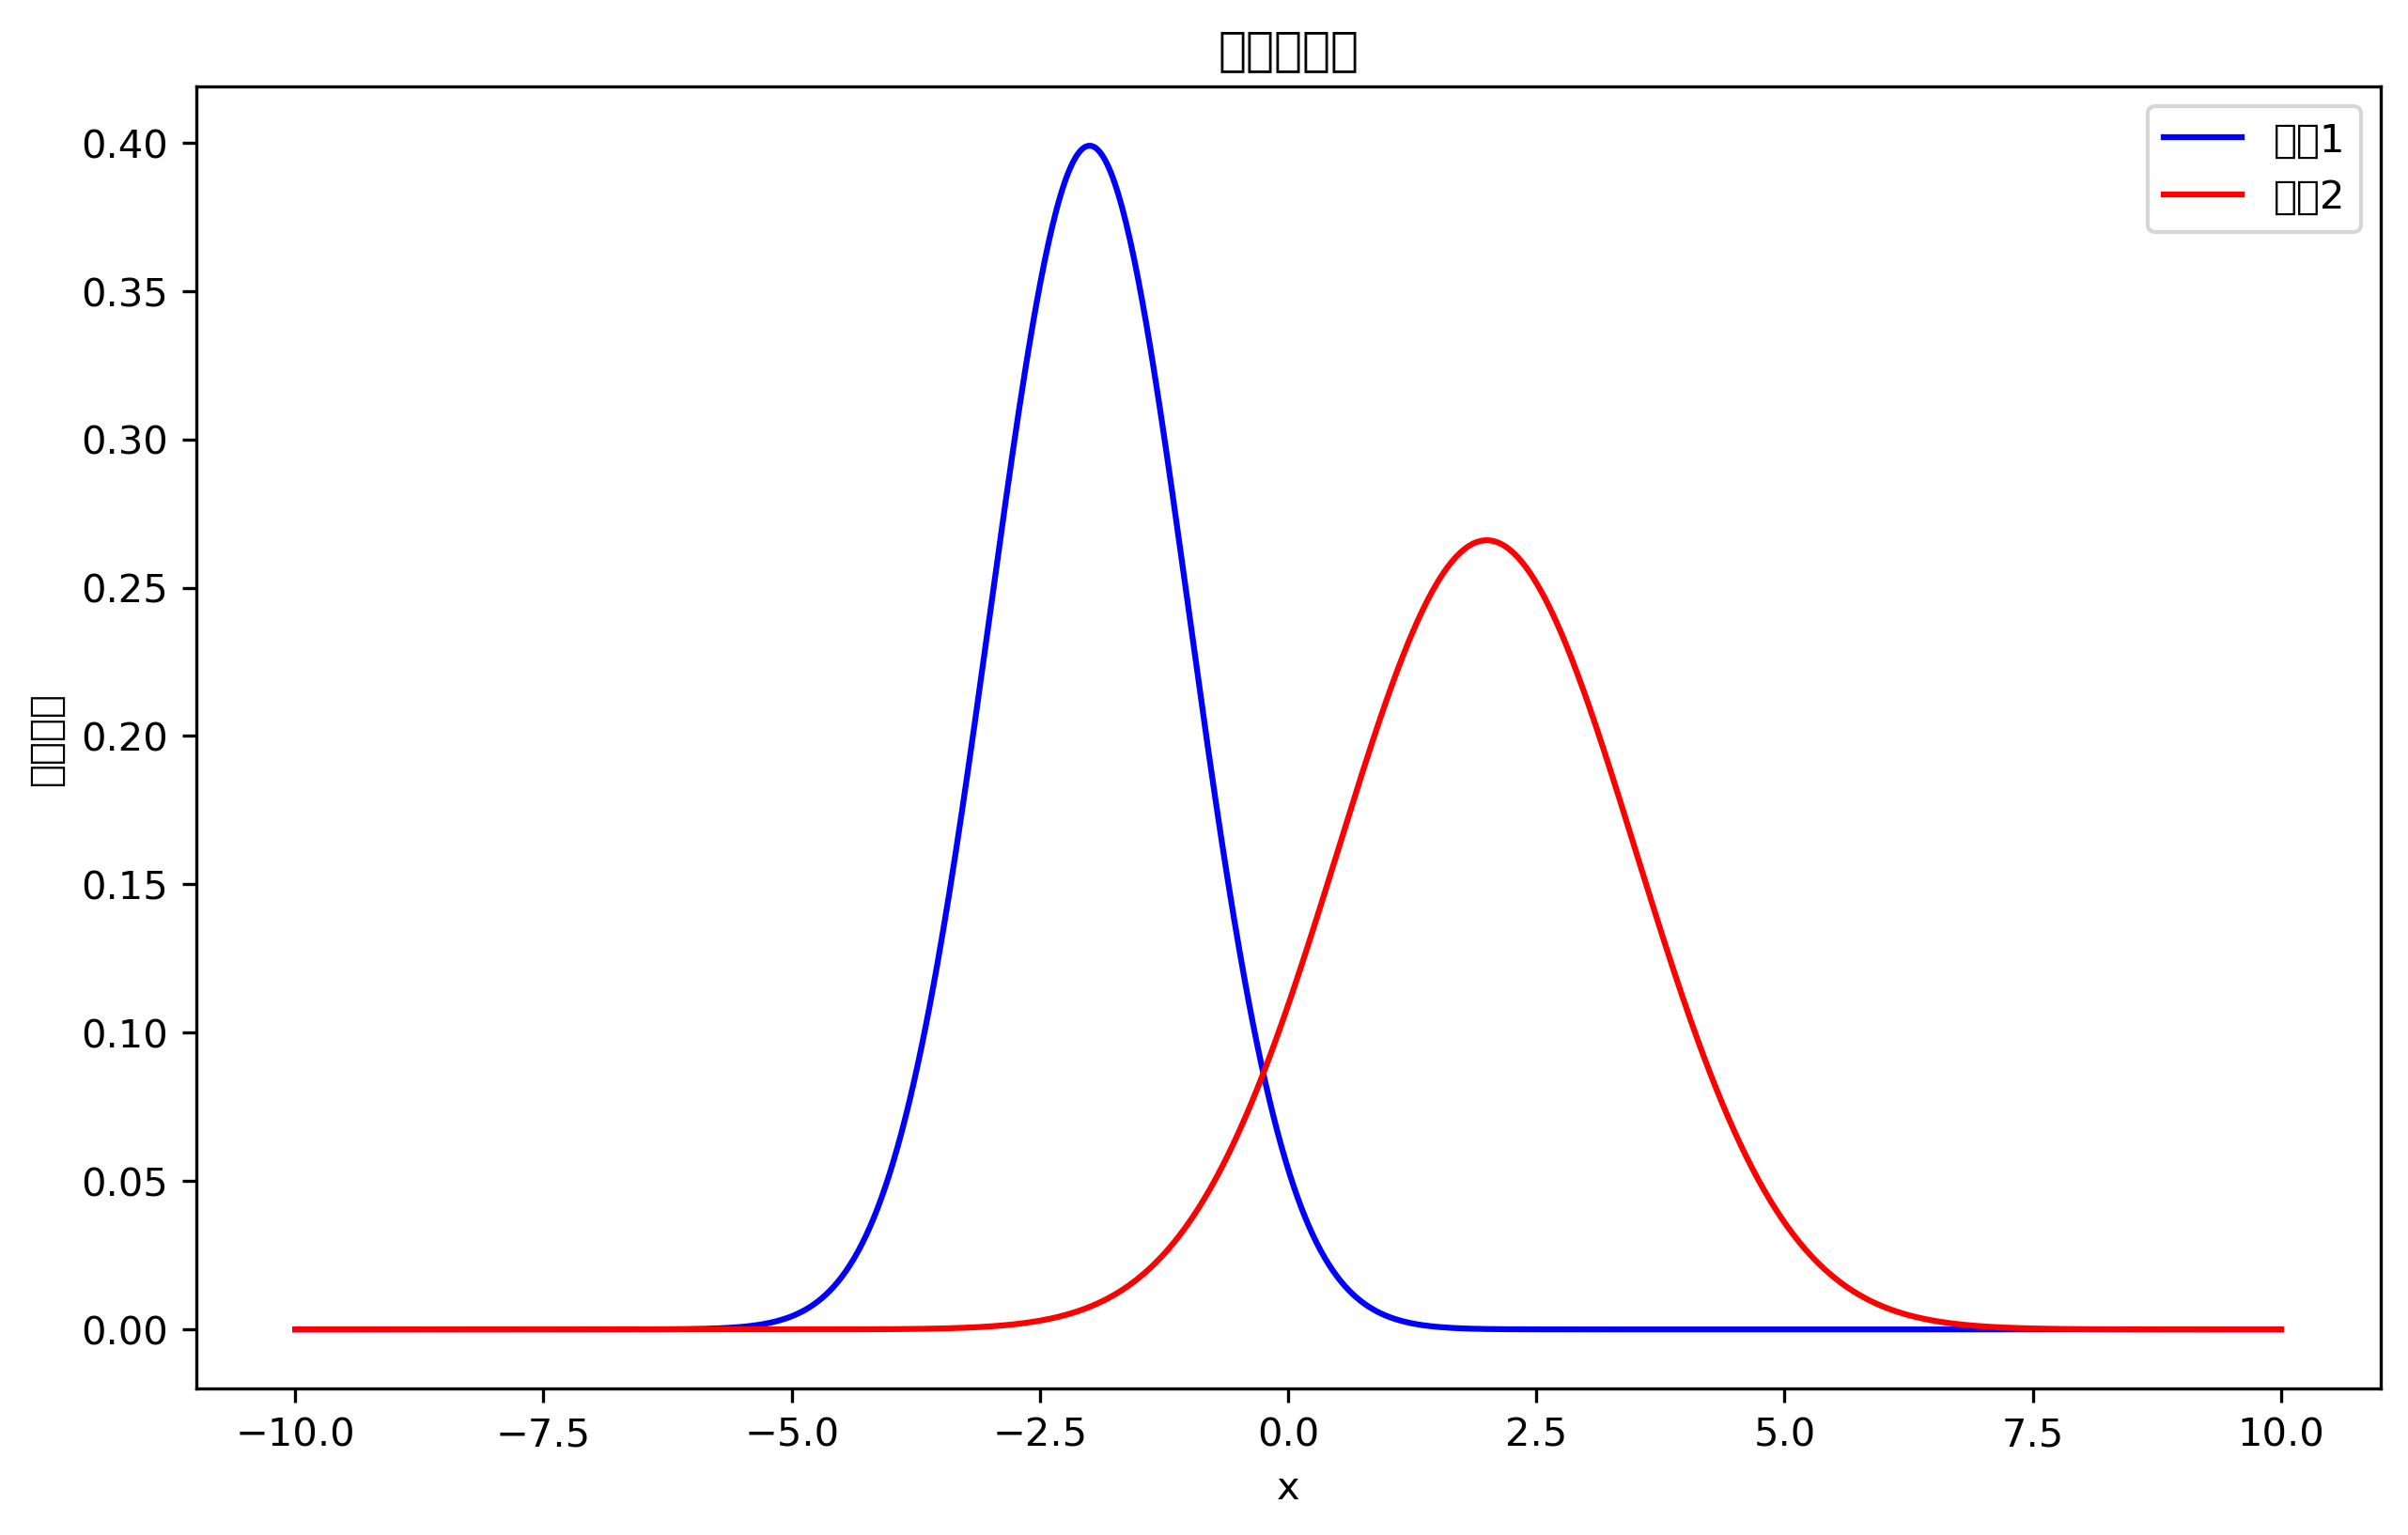

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 创建数据
x = np.linspace(-10, 10, 1000)
mu1, mu2, sigma1, sigma2 = -2, 2, 1, 1.5  # 两个峰的均值和标准差

# 计算两个高斯分布的概率密度函数
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)

# 绘制两个高斯分布
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='分布1', color='blue')
plt.plot(x, y2, label='分布2', color='red')

# 添加图例和标签
plt.title('双峰统计图')
plt.xlabel('x')
plt.ylabel('概率密度')
plt.legend()

# 显示图形
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK

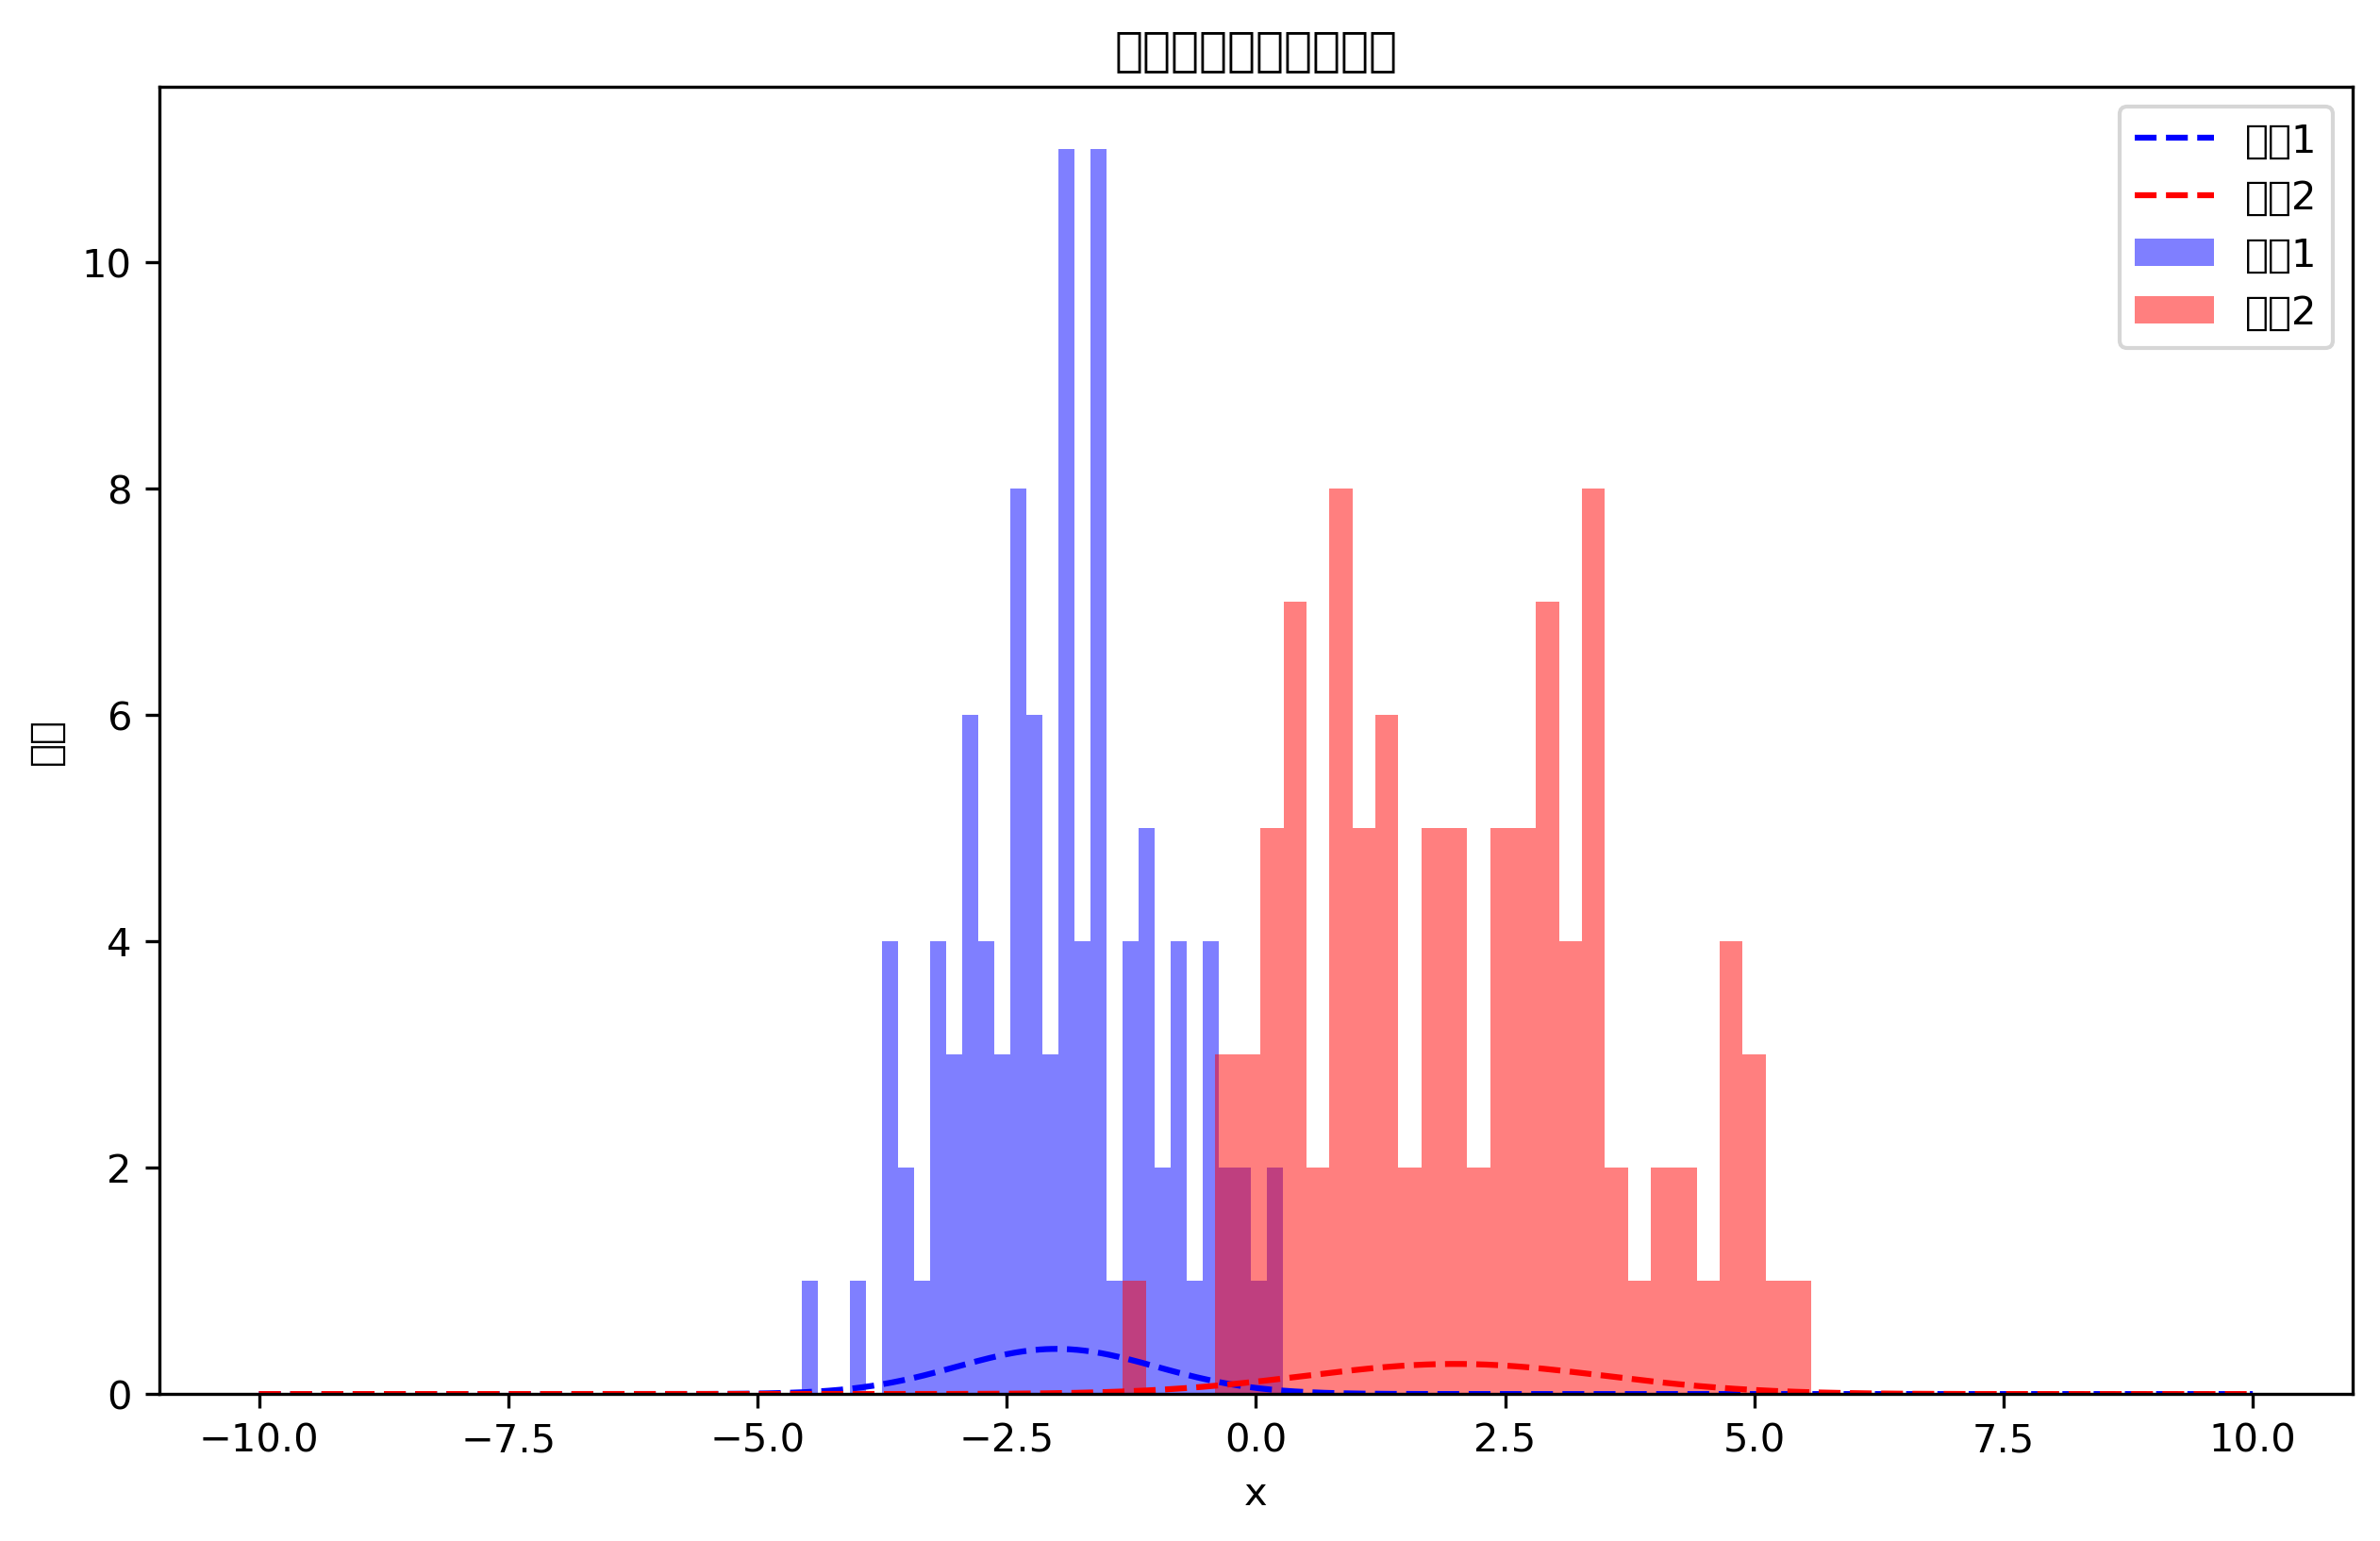

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 创建数据
x = np.linspace(-10, 10, 1000)
mu1, mu2, sigma1, sigma2 = -2, 2, 1, 1.5  # 两个峰的均值和标准差

# 计算两个高斯分布的概率密度函数
y1 = norm.pdf(x, mu1, sigma1)
y2 = norm.pdf(x, mu2, sigma2)

# 生成样本数据
np.random.seed(0)
data1 = norm.rvs(mu1, sigma1, size=100)
data2 = norm.rvs(mu2, sigma2, size=100)

# 绘制两个高斯分布
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='分布1', color='blue', linestyle='--')
plt.plot(x, y2, label='分布2', color='red', linestyle='--')

# 绘制柱状图
plt.hist(data1, bins=30, alpha=0.5, color='blue', label='样本1')
plt.hist(data2, bins=30, alpha=0.5, color='red', label='样本2')

# 添加图例和标签
plt.title('双峰统计图与样本数据')
plt.xlabel('x')
plt.ylabel('频率')
plt.legend()

# 显示图形
plt.show()